In [52]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Import the data file using collab
from google.colab import files
uploaded = files.upload()


Saving gas_turbines (1).csv to gas_turbines (1).csv


In [54]:
data = pd.read_csv("gas_turbines (1).csv")
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [55]:
# Turn all categories into numbers
df = pd.get_dummies(data)
df.head() # view the converted columns

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [56]:
# Create X & y values
X = df.drop("TEY", axis=1)
Y = df["TEY"]
X.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [57]:
X.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[1:10,:]

array([[-1.44960109, -0.74864748,  1.30456402, -0.92149498, -1.36352783,
        -1.4823253 ,  0.58524028, -1.36367619,  0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, -0.94438456, -1.35130868,
        -1.47627469,  0.56871459, -1.36095673,  0.5529378 ,  1.36358566],
       [-1.4137023 , -0.62385314,  1.16906032, -0.946884  , -1.34819399,
        -1.46417347,  0.58396907, -1.35642429,  0.54893264,  1.38287844],
       [-1.36869347, -0.54585668,  1.16188275, -0.92438907, -1.35466296,
        -1.45812286,  0.58269786, -1.35098537,  0.57417866,  1.34859077],
       [-1.3288206 , -0.38986375,  0.98483618, -0.89018625, -1.37430943,
        -1.45207225,  0.58142665, -1.33829455,  0.66341728,  1.35795064],
       [-1.31689834, -0.24947012,  0.93227321, -0.8820302 , -1.38005962,
        -1.43997103,  0.56871459, -1.32197778,  0.68173302,  1.36091141],
       [-1.32695898, -0.0778779 ,  0.8862353 , -0.90965555, -1.37670534,
        -1.45207225,  0.57507062, -1.31109994

In [59]:
Y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

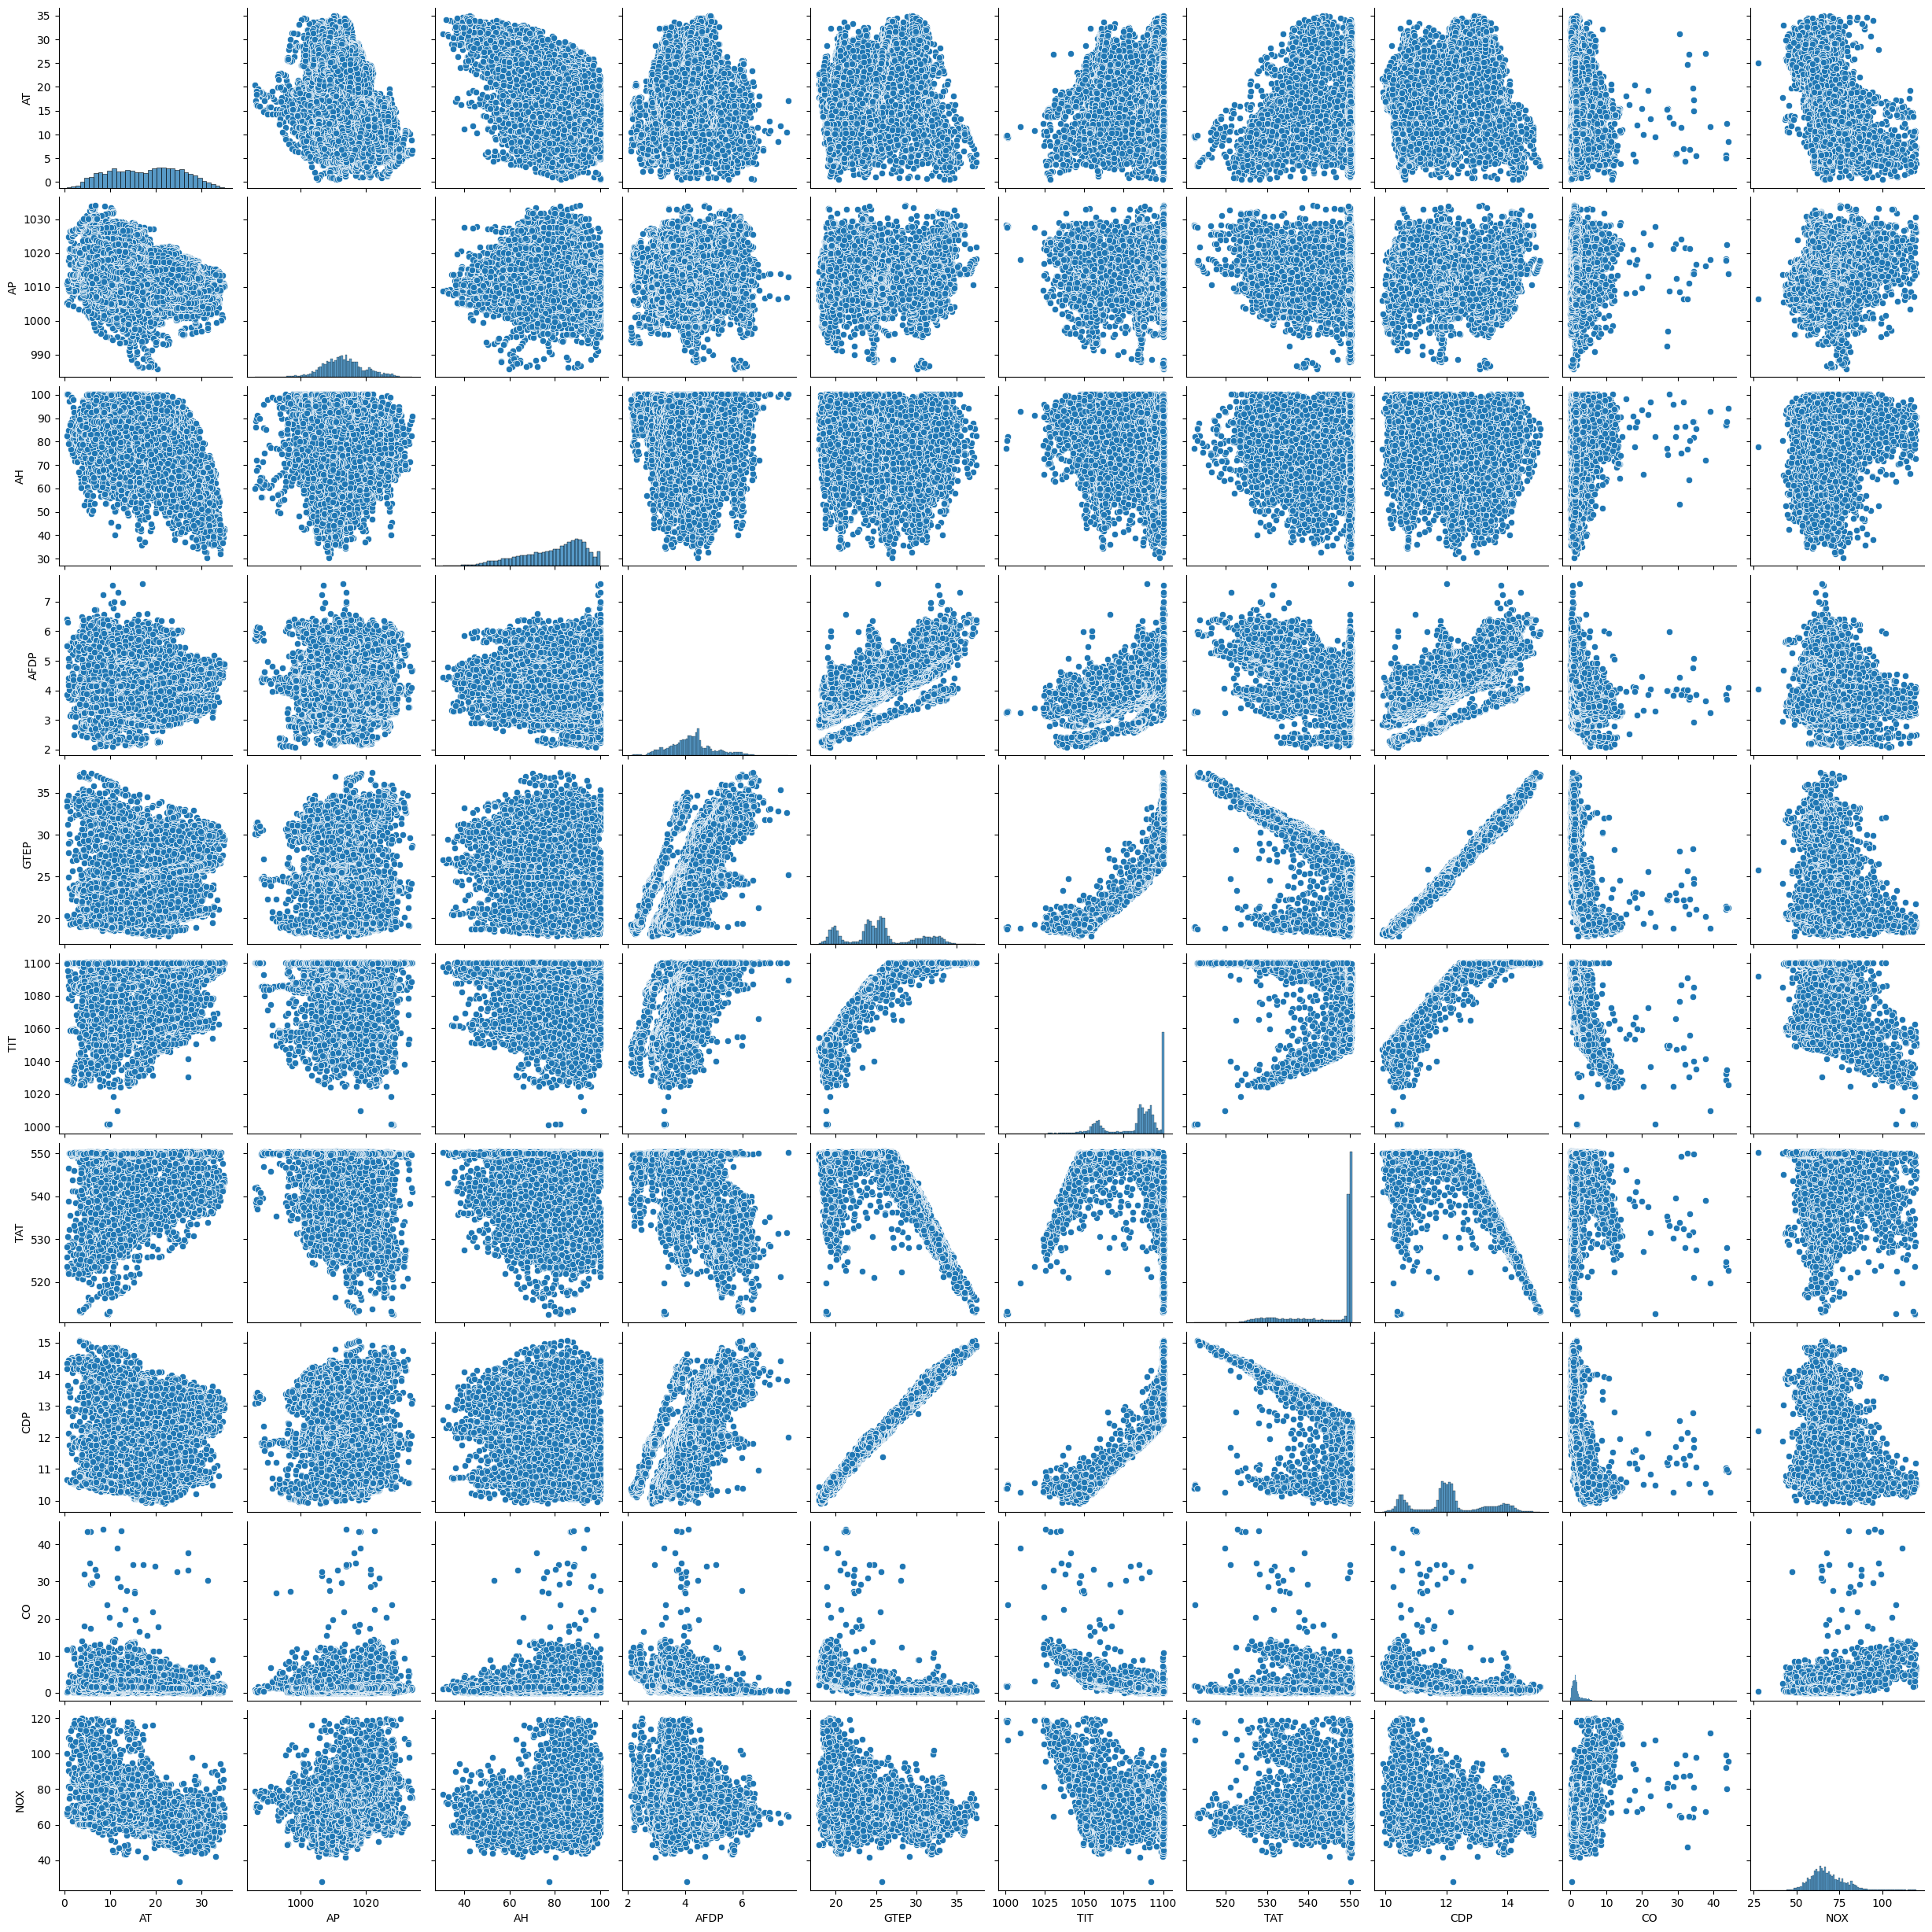

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

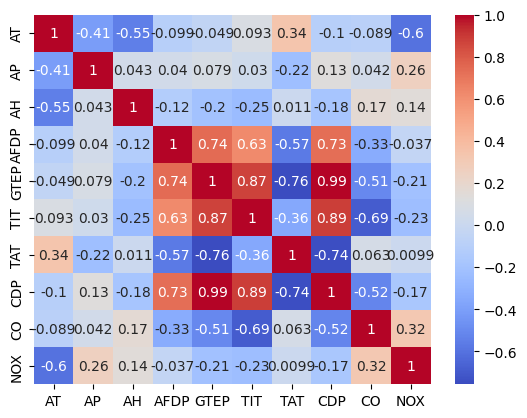

In [61]:
# Calculate correlation matrix
correlation_matrix = X.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

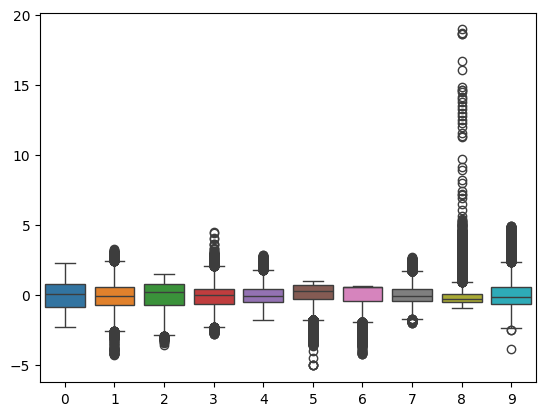

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [62]:
import numpy as np

sns.boxplot(data=X_scaled)
plt.show()
X.head()


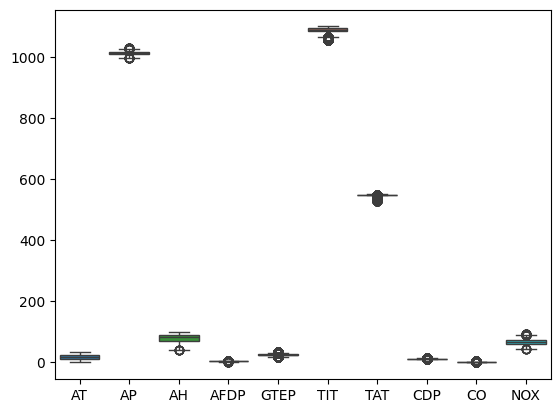

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [63]:

import numpy as np
def replace_outliers_with_median(df, columns):
  for column in columns:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - 1.5 * IQR
    upper_limit = df[column].quantile(0.75) + 1.5 * IQR
    df[column] = np.where(
        (df[column] < lower_limit) | (df[column] > upper_limit),
        df[column].median(),
        df[column]
    )
  return df

X = replace_outliers_with_median(X, X.columns)
sns.boxplot(data=X)
plt.show()
X.head()

In [64]:
from sklearn.linear_model import Lasso, Ridge


ridge = Ridge(alpha=2.0)
ridge.fit(X_scaled, Y)
print("Ridge coefficients:", ridge.coef_)


lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, Y)
print("Lasso coefficients:", lasso.coef_)


Ridge coefficients: [-2.73039924 -0.42350214 -0.09679864 -0.18643579  1.65596348  9.72418268
 -4.61266223  1.79063521 -0.02534902 -0.19299456]
Lasso coefficients: [-2.55797256 -0.06655629  0.         -0.          5.35557049  3.33416177
 -0.          6.99741172 -0.03835042 -0.        ]


In [65]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  features    VIF Factor
0       AT     19.329952
1       AP  19851.401866
2       AH     60.239165
3     AFDP     76.169052
4     GTEP    406.936265
5      TIT  19281.532860
6      TAT  12893.852929
7      CDP   1423.029114
8       CO      6.154354
9      NOX    123.717984


In [66]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12031, 10) (3008, 10) (12031,) (3008,)


In [68]:
# Set random seed
#tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [69]:
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)

Epoch 1/100
376/376 [==============================] - 2s 3ms/step - loss: 83.5455 - mae: 83.5455
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 1.6401 - mae: 1.6401
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 1.5564 - mae: 1.5564
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 1.5188 - mae: 1.5188
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 1.5465 - mae: 1.5465
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 1.4490 - mae: 1.4490
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 1.4225 - mae: 1.4225
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 1.3699 - mae: 1.3699
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 1.3440 - mae: 1.3440
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 1.3443 - mae: 1.3443
Epoch 11/100
376/376 [===============

In [70]:
mae_values = gas_turbines.history.history['mae']
len(mae_values)

100

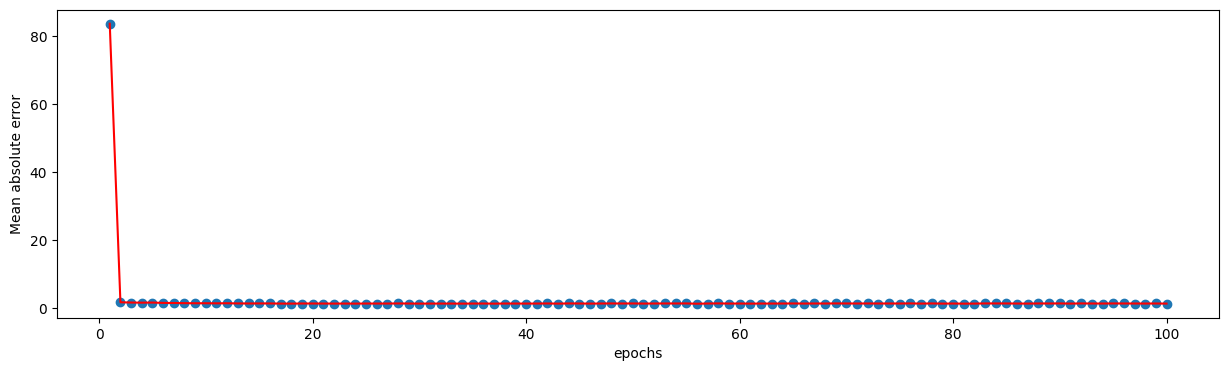

In [71]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()

In [72]:
# Set random seed
tf.random.set_seed(24)

# Add an extra layer and increase number of units
gas_turbines_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # 100 units
  tf.keras.layers.Dense(15), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
gas_turbines_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

#gas_turbines_2.compile(loss=tf.keras.losses.mae,
#                          optimizer=tf.keras.optimizers.SGD(), # Adam works but SGD doesn't
#                          metrics=['mae'])



In [73]:
# Fit the model and save the history (we can plot this)
gas_turbines_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
376/376 [==============================] - 3s 3ms/step - loss: 124.5139 - mae: 124.5139
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 23.4657 - mae: 23.4657
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5814 - mae: 0.5814
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5865 - mae: 0.5865
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5618 - mae: 0.5618
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5797 - mae: 0.5797
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5647 - mae: 0.5647
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5746 - mae: 0.5746
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5668 - mae: 0.5668
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5793 - mae: 0.5793
Epoch 11/100
376/376 [===========

In [74]:
# prompt: show me the .compile all hyper parameters

gas_turbines_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

print(gas_turbines_2.compile)

<bound method Model.compile of <keras.src.engine.sequential.Sequential object at 0x7e13b2db2ec0>>


In [75]:
mae_values = gas_turbines_2.history.history['mae']
len(mae_values)

100

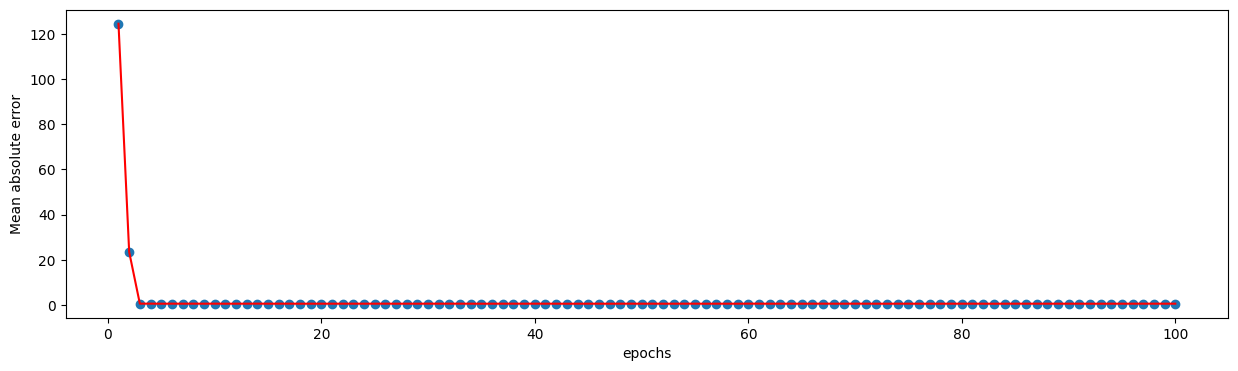

In [76]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


In [78]:
gas_turbines_2.evaluate(X_test, y_test)

94/94 [==============================] - 1s 3ms/step - loss: 0.5885 - mae: 0.5885


[0.5885319113731384, 0.5885319113731384]

Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 132.9507 - mae: 132.9507
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 128.4812 - mae: 128.4812
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 120.8854 - mae: 120.8854
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 110.1464 - mae: 110.1464
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 96.2861 - mae: 96.2861
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 79.2718 - mae: 79.2718
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 59.1565 - mae: 59.1565
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 35.9529 - mae: 35.9529
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 11.2070 - mae: 11.2070
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 0.6535 - mae: 0.6535
Epoch 11/100


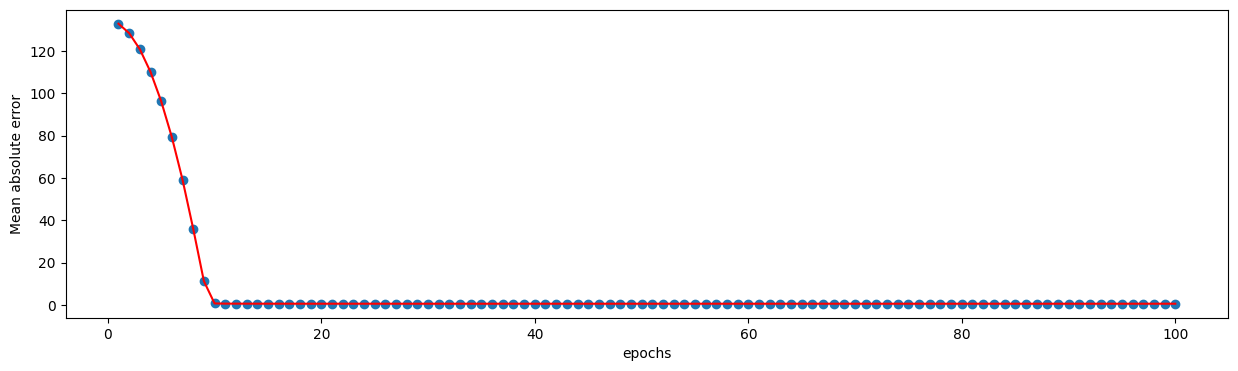

In [79]:
#tf.keras.optimizers.RMSprop()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.RMSprop(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 134.2496 - mae: 134.2496
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 134.2467 - mae: 134.2467
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 134.2433 - mae: 134.2433
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 134.2392 - mae: 134.2392
Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 134.2348 - mae: 134.2348
Epoch 6/100
376/376 [==============================] - 2s 5ms/step - loss: 134.2300 - mae: 134.2300
Epoch 7/100
376/376 [==============================] - 2s 4ms/step - loss: 134.2247 - mae: 134.2247
Epoch 8/100
376/376 [==============================] - 2s 4ms/step - loss: 134.2191 - mae: 134.2191
Epoch 9/100
376/376 [==============================] - 1s 4ms/step - loss: 134.2131 - mae: 134.2131
Epoch 10/100
376/376 [==============================] - 1s 4ms/step - loss: 134.2068 - mae: 134.2068

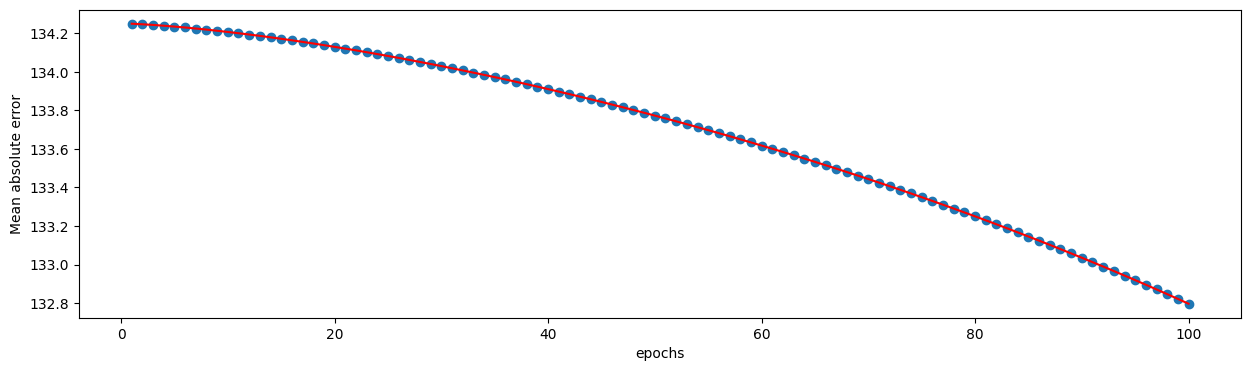

In [80]:
#  tf.keras.optimizers.Adadelta()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adadelta(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 134.1378 - mae: 134.1378
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 134.0372 - mae: 134.0372
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 133.9689 - mae: 133.9689
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 133.9114 - mae: 133.9114
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 133.8600 - mae: 133.8600
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 133.8124 - mae: 133.8124
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 133.7677 - mae: 133.7677
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 133.7249 - mae: 133.7249
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 133.6837 - mae: 133.6837
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 133.6439 - mae: 133.6439

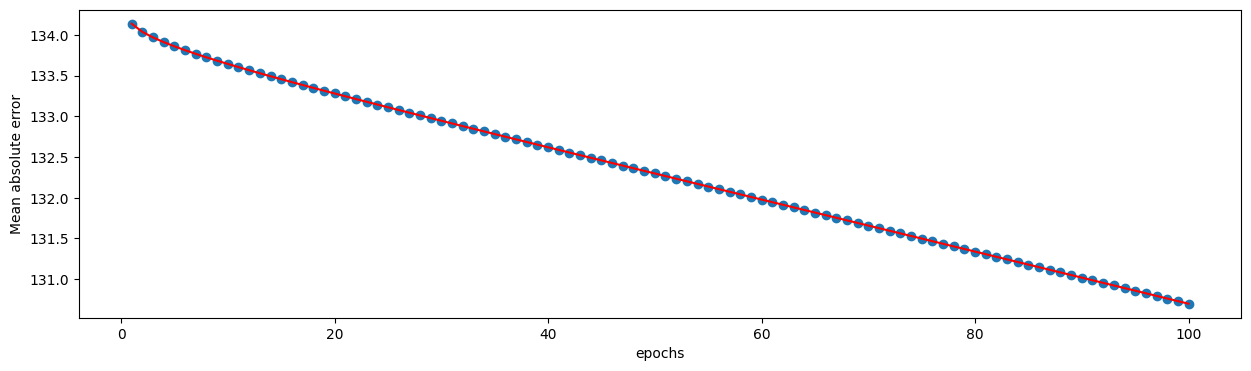

In [81]:
#tf.keras.optimizers.Adagrad()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adagrad(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 132.9396 - mae: 132.9396
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 129.2252 - mae: 129.2252
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 123.3252 - mae: 123.3252
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 114.8471 - mae: 114.8471
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 103.6388 - mae: 103.6388
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 89.6695 - mae: 89.6695
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 72.8673 - mae: 72.8673
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 53.1460 - mae: 53.1460
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 30.6669 - mae: 30.6669
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 8.0888 - mae: 8.0888
Epoch 11/10

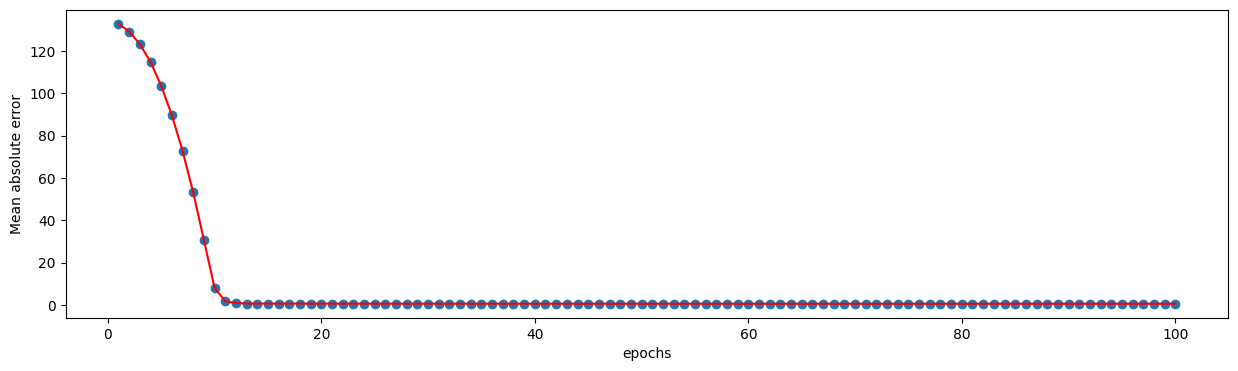

In [82]:
#tf.keras.optimizers.Adamax()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adamax(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()



Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 132.8619 - mae: 132.8619
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 125.6541 - mae: 125.6541
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 110.8075 - mae: 110.8075
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 89.0699 - mae: 89.0699
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 61.3182 - mae: 61.3182
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 28.2316 - mae: 28.2316
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 2.2200 - mae: 2.2200
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5527 - mae: 0.5527
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5450 - mae: 0.5450
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 0.5379 - mae: 0.5379
Epoch 11/100
376/376 

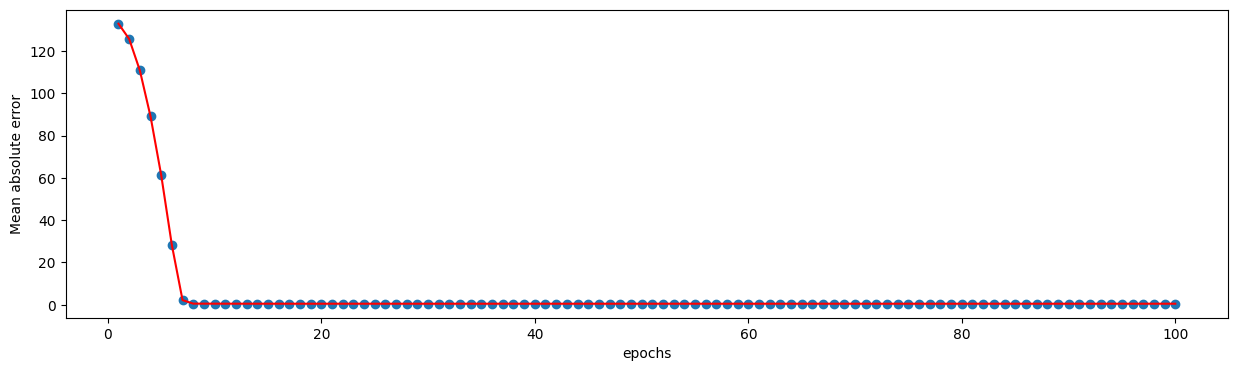

In [83]:
#  tf.keras.optimizers.Nadam()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Nadam(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()



Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 134.2191 - mae: 134.2191
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 134.1879 - mae: 134.1879
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 134.1579 - mae: 134.1579
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 134.1251 - mae: 134.1251
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 134.0903 - mae: 134.0903
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 134.0545 - mae: 134.0545
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 134.0181 - mae: 134.0181
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 133.9814 - mae: 133.9814
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 133.9447 - mae: 133.9447
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 133.9078 - mae: 133.9078

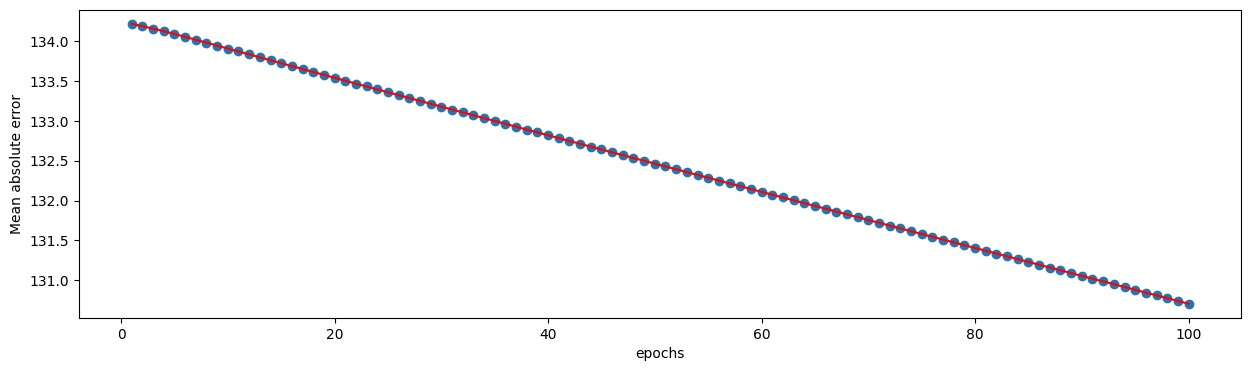

In [84]:
# tf.keras.optimizers.Ftrl()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Ftrl(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)
mae_values = gas_turbines.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()



Epoch 1/100
376/376 [==============================] - 2s 3ms/step - loss: 132.9392 - mae: 132.9392
Epoch 2/100
376/376 [==============================] - 2s 4ms/step - loss: 128.4133 - mae: 128.4133
Epoch 3/100
376/376 [==============================] - 1s 4ms/step - loss: 120.7678 - mae: 120.7678
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 109.9714 - mae: 109.9714
Epoch 5/100
376/376 [==============================] - 2s 4ms/step - loss: 96.0396 - mae: 96.0396
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 78.9780 - mae: 78.9780
Epoch 7/100
376/376 [==============================] - 1s 4ms/step - loss: 58.7963 - mae: 58.7963
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 35.5136 - mae: 35.5136
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 9.7495 - mae: 9.7495
Epoch 10/100
376/376 [==============================] - 1s 3ms/step - loss: 0.6050 - mae: 0.6050
Epoch 11/100
37

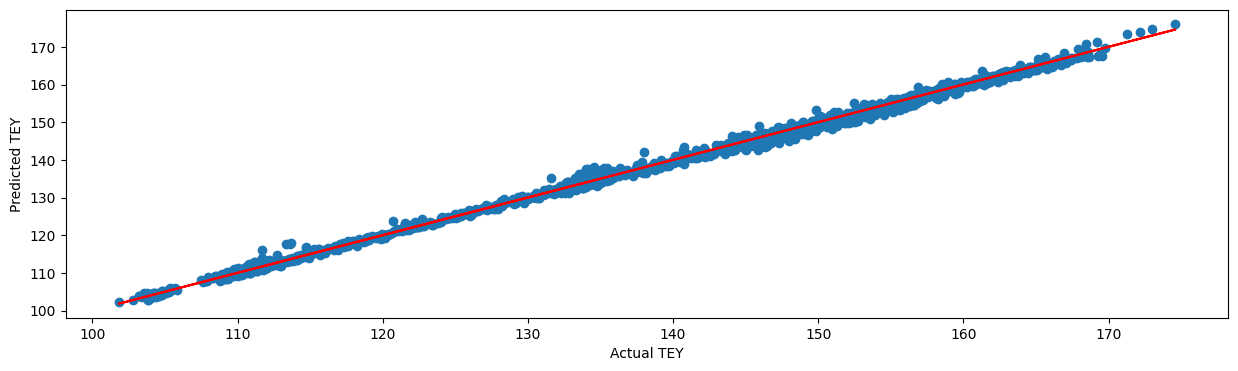

In [86]:
# turbine energy yield (TEY) using ambient variables as features.

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
gas_turbines = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
gas_turbines.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.RMSprop(),
                        metrics=['mae'])
# Fit the model
gas_turbines.fit(X_train, y_train, epochs=100)

# Make predictions
y_pred = gas_turbines.predict(X_test)

# Evaluate the model
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae.numpy())

# Plot the results
plt.figure(figsize=(15, 4))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.ylabel("Predicted TEY")
plt.xlabel("Actual TEY")
plt.show()
